In [485]:
import matplotlib.pyplot as plt
import numpy as np
import os

#Hamming code 8-12 implementation by Arseniy Koveshnikov from BIVT-18-3
#ITKN APD, NUST MISIS

base_path = "A:/hobby/vuz/miszki/aperture"
filename = "input.txt"
path_to_file = os.path.join(base_path, filename)
with open(path_to_file , 'r') as inputfile:
    lines = [line.strip('\n') for line in inputfile]
    x = 0
    inputx = []
    inputy = []
    for i in lines:
        inputx.append(x)
        inputy.append(int(i))
        x += 1

Исходный массив точек:
X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Y: [5, 10, 12, 30, 40, 12, 10, 8, 17, 22, 15, 20, 19, 18, 17, 16, 39, 36]


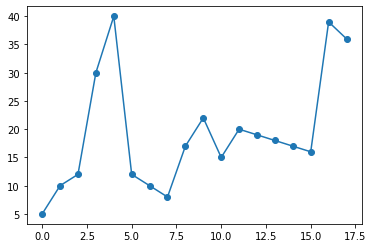

In [486]:
print("Исходный массив точек:")
print("X:", inputx)
print("Y:", inputy)

plt.plot(inputx, inputy, marker='o')
plt.show()

Заданная апертура равна 2


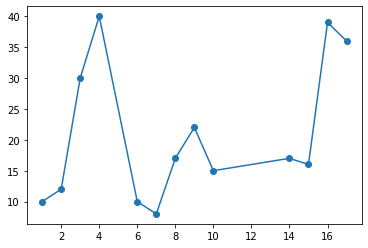

In [487]:
aperture = 2
#input(aperture)
print("Заданная апертура равна", aperture)

#функция линейной интерполяции, поиск Y исходя из значений [X1, Y1] и [X2, Y2] через уравнение прямой
def interpolate(x, x1, y1, x2, y2):
    return (x - x2) / (x1 - x2) * (y1 - y2) + y2

newx = inputx[:]
newy = inputy[:]

#print((inputx[1], inputx[0], inputx[2], inputy[0], inputy[2]))
#interpolated_y = interpolate(inputx[1], inputx[0], inputx[2], inputy[0], inputy[2])
#print(interpolated_y, inputy[1])
#print(np.interp(inputx[1], [inputx[0], inputx[2]], [inputy[0], inputy[2]]))

indexoffset = -1
for i in range(len(inputx)-2):
    check_y = inputy[i+1]
    interpolated_y = np.interp(inputx[i+1], [inputx[i], inputx[i+2]], [inputy[i], inputy[i+2]])
    #interpolated_y = interpolate(inputx[i+1], inputx[i], inputx[i+2], inputy[i], inputy[i+2])
    if (abs(check_y - interpolated_y) < aperture):
        indexoffset += 1
        del newx[i-indexoffset]
        del newy[i-indexoffset]

plt.plot(newx, newy, marker='o', label='new', )
plt.show()